# Part II - Factors affecting student performance on standardized exams
## by Amanda Doty

# Investigation Overview

I am intersted in the relationships between exam scores and: student belonging at school, parent education, and access to reading material and time spent reading.


## Dataset Overview and Executive Summary

1. The dataset is a subset of a much larger dataset that focuses only on the columns needed for the following visualizations and a random sampling of around 1200 rows.

2. I will show that there is a positive correlation between exam scores and:

>a. Highest level of education achieved by household parents

>b. The time spent reading when the number of books in the home is included as a factor

>c. The student's sense of belonging in school

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('/Users/amand/WGU/Communicating Data Findings_A Doty_01.20.24/student_qqq_sub.csv')

df.head()

,mother_edu,father_edu,qty_books,repeated,time_reading,outsider,belong,tmins,wealth,pv1math,pv1read,avg_score,tot_score
0,ISCED level 3A,ISCED level 3A,26-100 books,"No, never",30 minutes or less a day,Strongly disagree,Agree,1650,0,697.233,650.848,674.0405,1348.081
1,ISCED level 3A,"ISCED level 3B, 3C",26-100 books,"No, never",I do not read for enjoyment,Disagree,Disagree,1620,0,501.317,449.588,475.4525,950.905
2,ISCED level 3A,ISCED level 3A,11-25 books,"No, never",30 minutes or less a day,Disagree,Disagree,1350,-1,520.497,404.564,462.5305,925.061
3,"ISCED level 3B, 3C",ISCED level 3A,201-500 books,"No, never",1 to 2 hours a day,Strongly disagree,Agree,1650,0,563.845,522.237,543.0410,1086.082
4,ISCED level 3A,ISCED level 2,101-200 books,"No, never",30 minutes or less a day,Strongly disagree,Agree,1980,0,459.993,444.200,452.0965,904.193


## The effect of parent education on student exam performance

> As can be seen, the more education obtained by household parents, the better students perform on standardized exams. This could be due to several reasons, and is worth further study. For example, do parents who go to school for longer make more money, which could allow for personalized tutoring, or better school districts? Or does more education allow for better access to resources? Because there are several additional factors that could explain this result, I cannot say that parents' education **cause** better scores, but instead they tend to be positively correlated.

Text(0.5, 1.0, "Parent's Education and Total Exam Score")

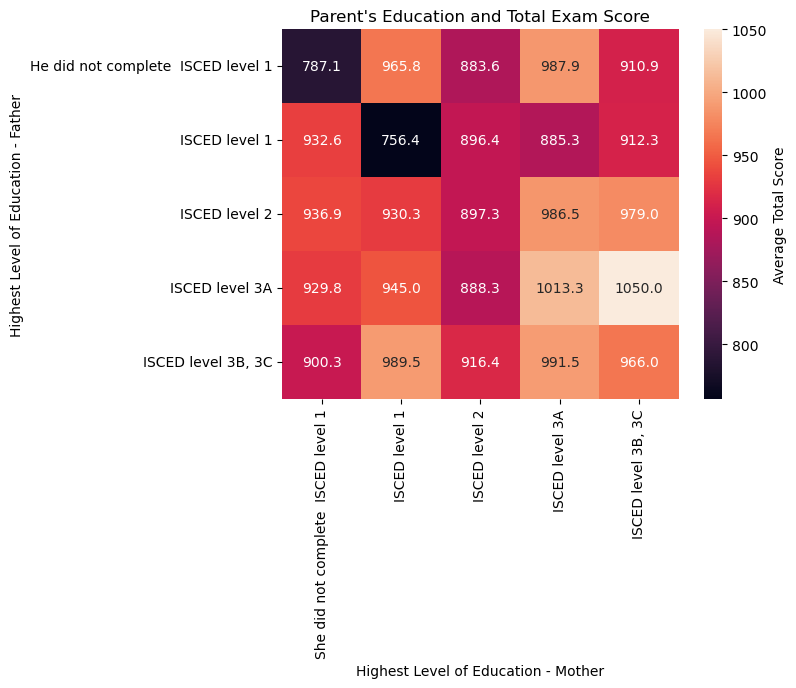

In [10]:
mo_edu=['She did not complete  ISCED level 1','ISCED level 1','ISCED level 2','ISCED level 3A', 'ISCED level 3B, 3C']
mo_classes=pd.CategoricalDtype(ordered=True, categories=mo_edu)
df['mother_edu'] = df['mother_edu'].astype(mo_classes)

cat_means = df.groupby(['mother_edu', 'father_edu']).mean()['tot_score']
cat_means = cat_means.reset_index(name='tot_score_avg')
cat_means = cat_means.pivot(index='father_edu', columns='mother_edu',
                            values='tot_score_avg')
sns.heatmap(cat_means, annot=True, fmt='.1f',
           cbar_kws = {'label' : 'Average Total Score'})
plt.xlabel('Highest Level of Education - Mother')
plt.ylabel('Highest Level of Education - Father')
plt.title("Parent's Education and Total Exam Score")

## Access to books, time spent reading, and exam score

> The below visual shows a positive correlation between the number of books in the home and time spent reading, which in turn has a slight positive correlation to exam scores. Again, there are many other factors that could also be playing a role in this correlation, primarily wealth. Books are a luxury item, and as such, households that have many books are likely to be wealthier, and therefor able to afford better schools, tutoring, or other educational luxuries that could positively impact a student's performance.

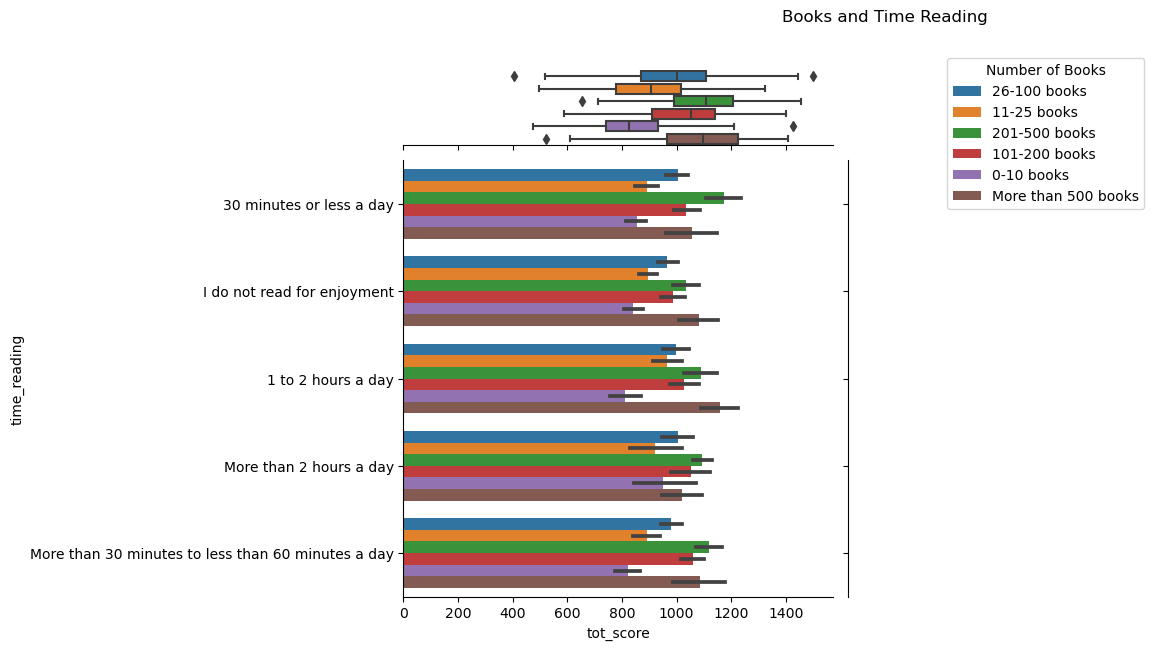

In [12]:
g = sns.JointGrid(data=df, x="tot_score", y="time_reading", hue="qty_books");
g.plot_joint(sns.barplot)
sns.boxplot(data=df, y=g.hue, x=g.x, ax=g.ax_marg_x);

sns.move_legend(g.ax_joint, "upper left", title='Number of Books',bbox_to_anchor=(1.25, 1.25))

plt.title('Books and Time Reading',y=1.0,pad=100.0);

## School relationships and exam scores

> There is a definite correlation between a sense of belonging and test scores. This could be to several factors, including extra curricular activies, attendance, behavior, teacher attention, and peer relationships. As such, I cannot declare a causal relationship, but there does appear to be a significant positive correlation between feeling safe and happy at school and exam scores.

In [31]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

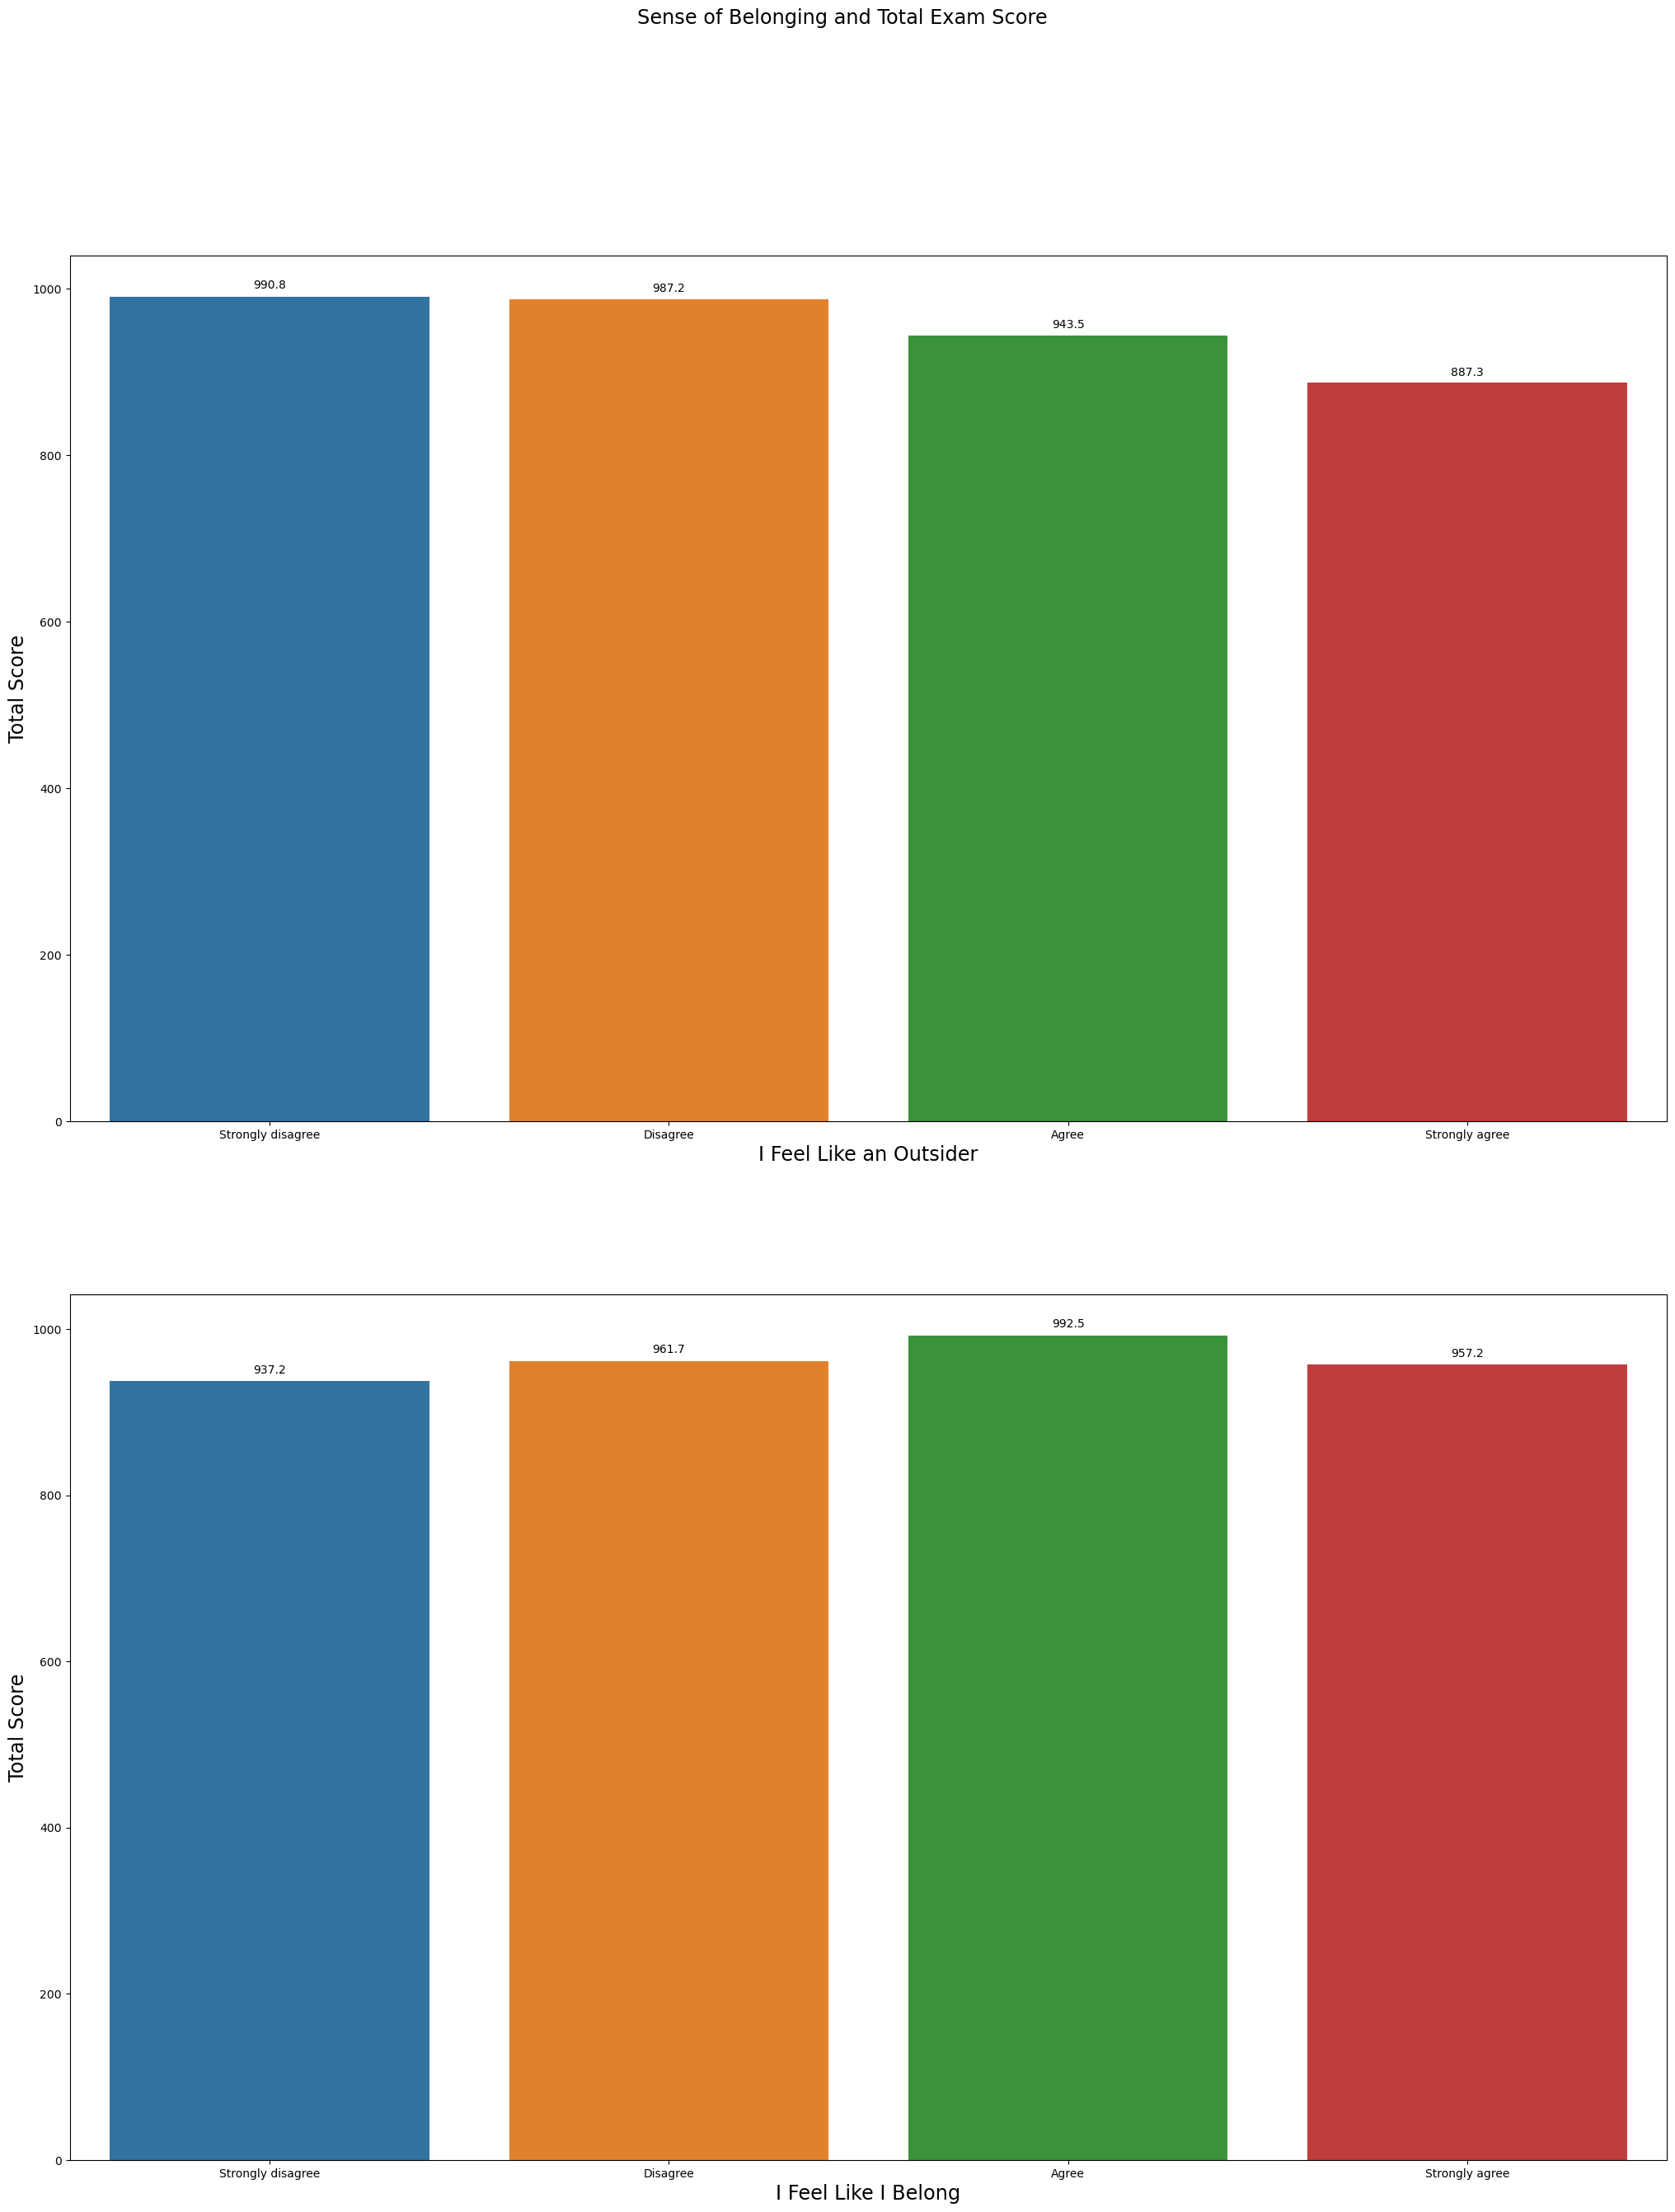

In [61]:
outsider=['Strongly disagree','Disagree','Agree','Strongly agree']
out_classes=pd.CategoricalDtype(ordered=True, categories=outsider)
df['outsider'] = df['outsider'].astype(out_classes)

belong=['Strongly disagree','Disagree','Agree','Strongly agree']
belong_classes=pd.CategoricalDtype(ordered=True, categories=belong)
df['belong'] = df['belong'].astype(belong_classes)

fig, ax = plt.subplots(2,1,figsize=(25,30))
plt.suptitle('Sense of Belonging and Total Exam Score',size='xx-large');

a = sns.barplot(data=df, x="outsider", y="tot_score", ci = None, ax=ax[0]);
show_values(a);
ax[0].set_xlabel('I Feel Like an Outsider', size='xx-large');
ax[0].set_ylabel('Total Score',size='xx-large');

b = sns.barplot(data=df, x='belong',y='tot_score', ci=None,ax=ax[1]);
show_values(b)
ax[1].set_xlabel('I Feel Like I Belong',size='xx-large')
ax[1].set_ylabel('Total Score',size='xx-large');
